In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
# Reading the Dataset
df = pd.read_csv("/content/data.csv")

In [6]:
df.head()

Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105

In [7]:
df.shape


(36, 5)

In [11]:
print(df.corr(numeric_only=True))

          Volume    Weight       CO2
Volume  1.000000  0.753537  0.592082
Weight  0.753537  1.000000  0.552150
CO2     0.592082  0.552150  1.000000


In [9]:
print(df.dtypes)


Car       object
Model     object
Volume     int64
Weight     int64
CO2        int64
dtype: object


In [12]:
print(df.describe())

            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000


Then make a list of the independent values and call this variable X.

 Put the dependent values in a variable called y.

It is common to name the list of independent values with an uppercase X and the list of dependent values with a lowercase y.

Equation: Sales = β0 + (β1 Weight) + (β2 Volume) + e
Setting the values for independent (X) variable and dependent (Y) variable

In [13]:
#Setting the value for X and Y
X = df[['Weight', 'Volume']]
y = df['CO2']

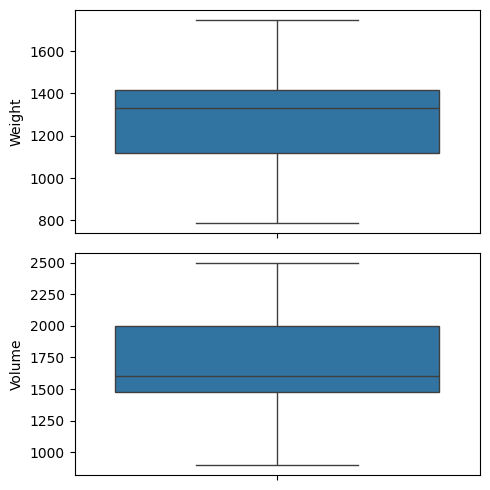

In [14]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['Weight'], ax = axs[0])
plt2 = sns.boxplot(df['Volume'], ax = axs[1])
plt.tight_layout()

**Exploratory Data Analysis**

# Distribution of the target variable

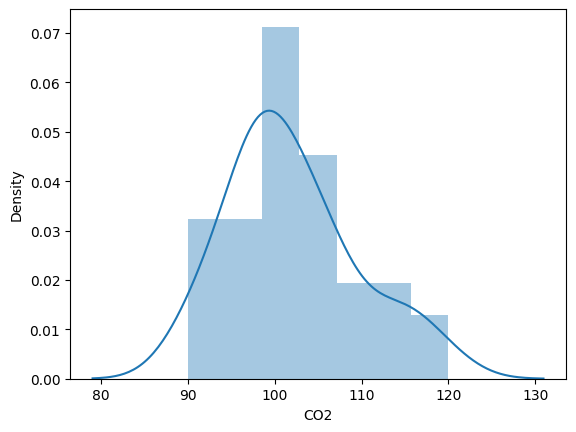

In [15]:
sns.distplot(df['CO2']);

Conclusion: It is normally distributed

Relationship of CO2 with other variables

In [16]:
sns.pairplot(df, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.show()

Heatmap The sns.heatmap() function creates a visualization that shows the correlation matrix of a dataset as a heatmap. The annot parameter of this function shows or does not show correlation values in the cells of the heatmap. If this parameter is set to True, correlation values in cells are displayed.

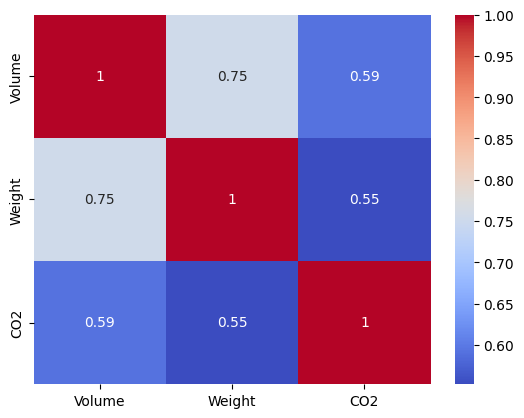

In [18]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = 'coolwarm')
plt.show()

In [19]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [20]:
y_train.shape


(25,)

In [21]:
y_test.shape

(11,)

In [22]:
reg_model = linear_model.LinearRegression()

In [23]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [24]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  74.33882836589245


[('Weight', 0.0171800645996374), ('Volume', 0.0025046399866402976)]

In [25]:
#Predicting the Test and Train set result
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

In [26]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [27]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

Actual value  Predicted value
0             99        90.415719
19           105       102.163234
32           104        99.563632
35           120       104.566618
7             92       101.546577
12            99        95.947700
29           114       108.640118
33           108       102.226542
5            105        92.803748
1             95        97.273271
18           104        97.570745

In [28]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 6.901980901636316
Mean Square Error: 63.39765310998794
Root Mean Square Error: 7.96226432053018
